## Data Collection

### About Dataset

This dataset has data from 2014-2016 data for different commodities purchased across the state of Maharashtra.

<h6>Columns</h6>
<ol>
    <li><b>APMC</b> : Agricultural Produce Marketing Committee. It is a categorical variable. Places of different APMC are in it.</li><br>
    <li><b>Commodity</b> : Names of commodities grown. Categorical.</li><br>
    <li><b>Year</b> : Year of collection of the commodity at APMC.</li><br>
    <li><b>Month</b> : Month of collection.</li><br>
    <li><b>arrivals_in_qtl</b> : Quantity if commodity collected in quintals.</li><br>
    <li><b>min_price</b> : Minimum price for the commodity.</li><br>
    <li><b>max_price</b> : Maximum price for the commodity.</li><br>
    <li><b>modal_price</b> : Target variable. Price given to farmers.</li><br>
    <li><b>date</b> : Date of collection.</li><br>
    <li><b>district_name</b> : Name of the district of APMC.</li><br>
    <li><b>state_name</b> : Name of state. Considering only for Maharashtra, so all values are Maharashtra.</li><br>
</ol>       

In [1]:
## Importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Loading the dataset
df1=pd.read_csv('Monthly_data_cmo.csv')

In [3]:
## First 5 rows
df1.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [4]:
## Check dimensions
df1.shape

(62429, 11)

##### There are total 62429 rows and 11 columns.

## Exploratory data analysis.

In [5]:
df1.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


In [6]:
## Number of unique values in each columns
print("Column name : unique values")
for i in df1.columns:
    print(i," : ",df1[i].nunique())

Column name : unique values
APMC  :  349
Commodity  :  352
Year  :  3
Month  :  12
arrivals_in_qtl  :  11169
min_price  :  8503
max_price  :  9739
modal_price  :  9327
date  :  27
district_name  :  33
state_name  :  1


<i>The state column only has 1 unique value in it. So it will not help in modelling.</i>

In [7]:
## 3 categories in Year.
df1['Year'].value_counts()

2016    28971
2015    25557
2014     7901
Name: Year, dtype: int64

<i>There are less data on year 2014.<i>

In [8]:
## Which year is highest in terms of modal_price.
df1[['arrivals_in_qtl','min_price','max_price','modal_price']].groupby(df1["Year"]).sum().sort_values(by="modal_price",ascending=False)

,arrivals_in_qtl,min_price,max_price,modal_price
Year,,,,
2016,167763619,86826086,111944031,99608865
2015,159554268,76236512,91808885,82570880
2014,49946074,20805015,26536030,23586488


<i>The count of 2015 and 2016 were almost equal, so on compairing on both 2016 has highest modal_price.</i>

In [9]:
## Top 10 districts in terms of model_price
df1['modal_price'].groupby(df1['district_name']).sum().sort_values(ascending=False).head(10)

district_name
Pune          17710875
Nagpur        12636741
Ahmadnagar    12242695
Mumbai        12002941
Solapur       11567353
Buldhana      10504472
Nasik         10167567
Amaravathi     9397075
Jalgaon        7849484
Satara         7343544
Name: modal_price, dtype: int64

In [10]:
## Highest modal_price month_wise
df1['modal_price'].groupby(df1['Month']).sum().sort_values(ascending=False).head(12)

Month
October      23335203
November     22729212
September    21257429
June         17793744
January      16146410
May          15763734
December     15663199
July         15181741
August       14756135
April        14578057
February     14442010
March        14119359
Name: modal_price, dtype: int64

In [11]:
## Creating a copy
df5=df1.copy()

In [12]:
## Creating a dictionary of months
mon={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}

In [13]:
## Mapping Month column with mon dictionary
df5['Month'] = df5['Month'].map(mon)

In [14]:
## Output
df5.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,4,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,4,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,4,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,4,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,4,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [15]:
df7=df5['Commodity'].groupby(df5['district_name']).count().reset_index(name='count').sort_values(by=['count'],ascending=False)

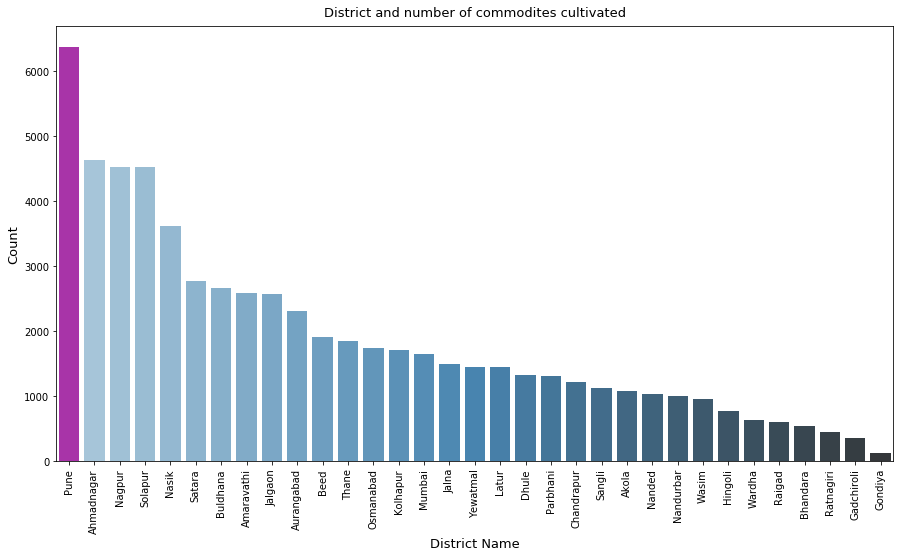

In [16]:
plt.figure(figsize=(15,8))
plt.title("District and number of commodites cultivated",fontsize=13,pad=10)
ax=sns.barplot(x="district_name", y="count", data=df7,palette="Blues_d")
plt.xticks(rotation=90)
plt.xlabel("District Name",fontsize=13)
plt.ylabel("Count",fontsize=13)

patch_h = []    
for patch in ax.patches:
    reading = patch.get_height()
    patch_h.append(reading)
# patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h)   
# np.argmax return the index of largest value of the list

ax.patches[idx_tallest].set_facecolor('#a834a8')  

##### From graph : <br>
<ol>
    <li><i>Pune has higher cultivation than other districts in Maharashtra.</i></li>
    <li><i>Almost 28 districts have wide range of commodities cultivated or have more cultivated areas.</i></li>
</ol>

In [17]:
df6=df5['Commodity'].groupby(df5['Commodity']).count().reset_index(name="count").sort_values(by=['count'],ascending=False).head(30)

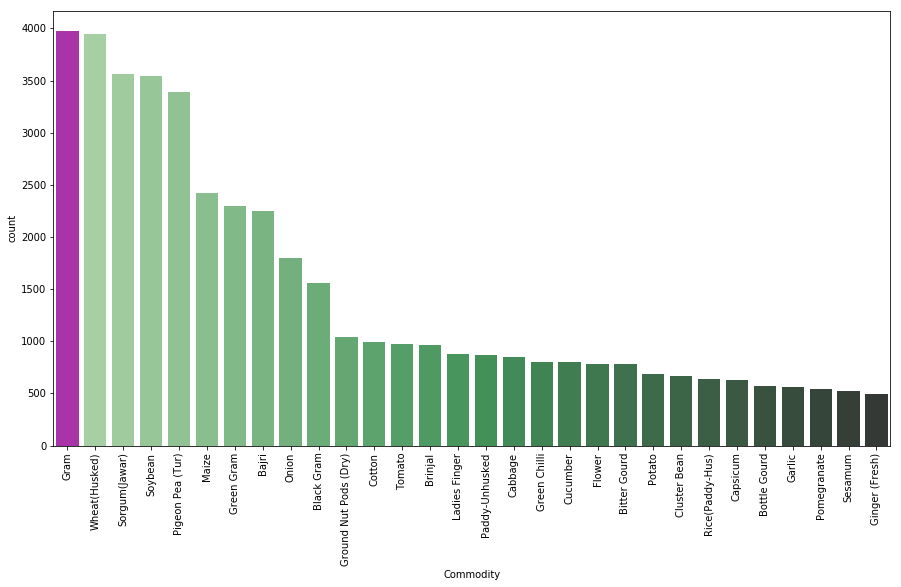

In [18]:
## Top 30 commodity production
plt.figure(figsize=(15,8))
ax2=sns.barplot(x="Commodity", y="count", data=df6,palette="Greens_d")
plt.xticks(rotation=90)

patch_h = []    
for patch in ax2.patches:
    reading = patch.get_height()
    patch_h.append(reading)
# patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h)   
# np.argmax return the index of largest value of the list

ax2.patches[idx_tallest].set_facecolor('#a834a8')  

##### From graph : <br>
<ol>
    <li><i>Gram is the most popular commodity cultivated in Maharashtra.</i></li>
    <li><i>Wheat is the major cereal cultivated in Maharashtra.</i></li>
</ol>

Text(0, 0.5, 'Modal Price')

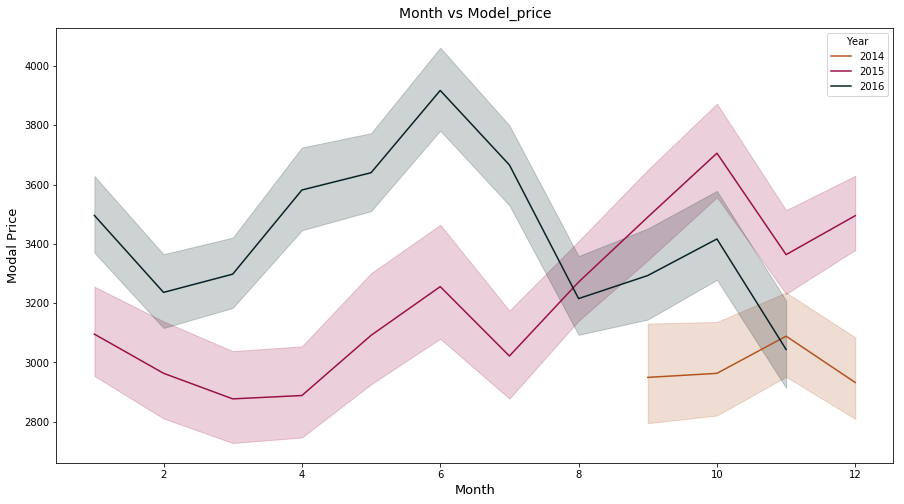

In [19]:
plt.figure(figsize=(15,8))
plt.title("Month vs Model_price", fontsize=14,pad=10)
sns.lineplot(data=df5, x=df5["Month"], y=df5["modal_price"],hue='Year',palette=['#B3541E', '#9C0F48','#072227'])
plt.xlabel("Month",fontsize=13)
plt.ylabel('Modal Price',fontsize=13)

##### From graph : <br>
<ol>
    <li><i>The values of 2014 start from september.</i></li>
    <li><i>The price given to farmers in 2015 increased after june but in 2016 it decreased after june.</i></li>
    <li><i>The model_price is highest in june of 2016.</i></li>
</ol>

Text(0, 0.5, 'In qunitals')

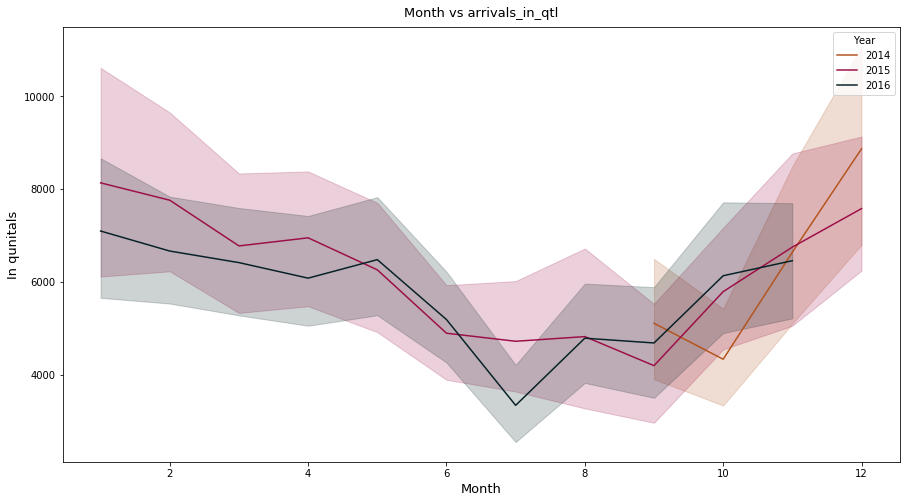

In [20]:
plt.figure(figsize=(15,8))
plt.title("Month vs arrivals_in_qtl",pad=10,fontsize=13)
sns.lineplot(data=df5, x=df5["Month"], y=df5["arrivals_in_qtl"],hue='Year',palette=['#B3541E', '#9C0F48','#072227'])
plt.xlabel("Month",fontsize=13)
plt.ylabel('In qunitals',fontsize=13)

##### From graph : <br>
<ol>
    <li><i>The arrival of crops decreases towards the mid months and increases towards the end months.</i></li>
    <li><i>The arrival of crops in 2016 is low, but the model_price was high.This indicates that there must be change in the price of commodity.</i></li>
</ol>

## Pre-Processing

<b>1. Checking Missing values</b>

In [21]:
## Missing values check
df1.isnull().sum()

APMC               0
Commodity          0
Year               0
Month              0
arrivals_in_qtl    0
min_price          0
max_price          0
modal_price        0
date               0
district_name      0
state_name         0
dtype: int64

<i>No missing values found in the dataset.<i>

<b>2. Checking outliers</b>

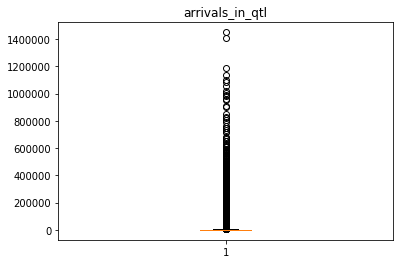

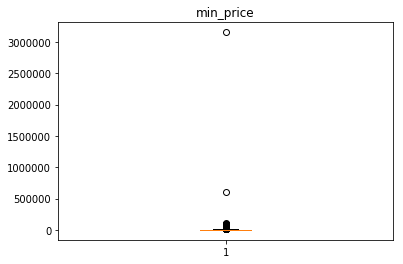

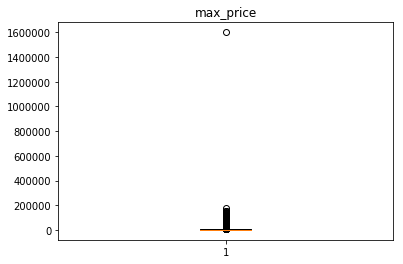

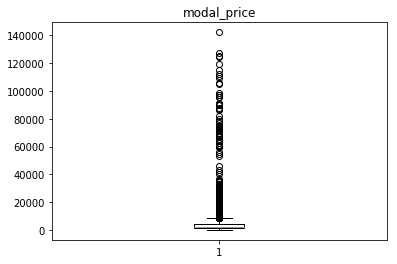

In [22]:
## Outliers check
for i in ['arrivals_in_qtl','min_price', 'max_price',
       'modal_price']:
    plt.title(i)
    plt.boxplot(df1[i])
    plt.show()  

<i>There are outliers in all numeric columns.</i>

In [23]:
## Handling outliers in arrivals_in_qtl
q1 = np.percentile(df1['arrivals_in_qtl'],25,interpolation='midpoint')
q3 = np.percentile(df1['arrivals_in_qtl'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

In [24]:
## Removing those outliers
index=df1['arrivals_in_qtl'][(df1['arrivals_in_qtl']<low_limit)|(df1['arrivals_in_qtl']>high_limit)].index
df1.drop(index,inplace=True)

In [25]:
len(df1)

52225

In [26]:
## Handling outliers in min_price
q1 = np.percentile(df1['min_price'],25,interpolation='midpoint')
q3 = np.percentile(df1['min_price'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

## Removing outliers
index=df1['min_price'][(df1['min_price']<low_limit)|(df1['min_price']>high_limit)].index
df1.drop(index,inplace=True)

In [27]:
len(df1)

50493

In [28]:
## Handling outliers in max_price
q1 = np.percentile(df1['max_price'],25,interpolation='midpoint')
q3 = np.percentile(df1['max_price'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

## Removing outliers
index=df1['max_price'][(df1['max_price']<low_limit)|(df1['max_price']>high_limit)].index
df1.drop(index,inplace=True)

In [29]:
len(df1)

49538

In [30]:
## Handling outliers in modal_price
q1 = np.percentile(df1['modal_price'],25,interpolation='midpoint')
q3 = np.percentile(df1['modal_price'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

## Removing outliers
index=df1['modal_price'][(df1['modal_price']<low_limit)|(df1['modal_price']>high_limit)].index
df1.drop(index,inplace=True)

In [31]:
len(df1)

48822

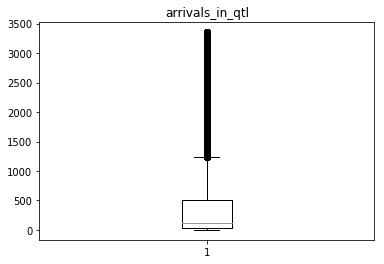

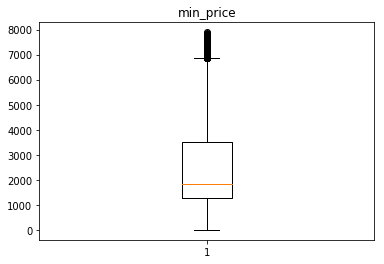

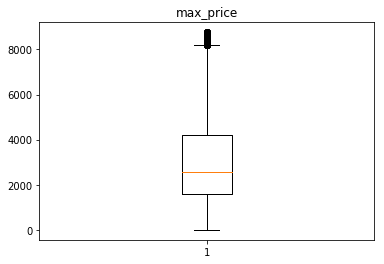

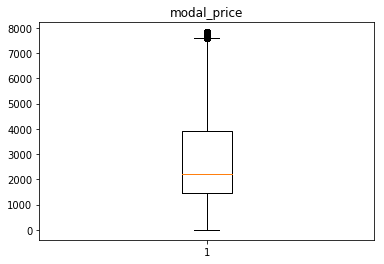

In [32]:
## After removal of outliers
for i in ['arrivals_in_qtl','min_price', 'max_price',
       'modal_price']:
    plt.title(i)
    plt.boxplot(df1[i])
    plt.show() 

<b>3. Datatype correction</b>

In [33]:
df1.dtypes

APMC               object
Commodity          object
Year                int64
Month              object
arrivals_in_qtl     int64
min_price           int64
max_price           int64
modal_price         int64
date               object
district_name      object
state_name         object
dtype: object

<i>Date is not in date type so it need to convert into date type.</i>

In [34]:
## Converting to date type
df1['date'] =  pd.to_datetime(df1['date'])

In [35]:
## Checking if the datatype change.
df1.dtypes

APMC                       object
Commodity                  object
Year                        int64
Month                      object
arrivals_in_qtl             int64
min_price                   int64
max_price                   int64
modal_price                 int64
date               datetime64[ns]
district_name              object
state_name                 object
dtype: object

<b>4. Checking for duplicates</b>

In [36]:
## Checking for duplcates 
duplicate = df1[df1.duplicated()]

In [37]:
duplicate.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name


<i> No duplicate data in the dataset.</i>

<b>5. Encoding<b>

In [38]:
## One-hot encoding year column
df2=pd.get_dummies(df1,columns=['Year'])

In [39]:
df2.head()

,APMC,Commodity,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,Year_2014,Year_2015,Year_2016
0,Ahmednagar,Bajri,April,79,1406,1538,1463,2015-04-01,Ahmadnagar,Maharashtra,0,1,0
1,Ahmednagar,Bajri,April,106,1788,1925,1875,2016-04-01,Ahmadnagar,Maharashtra,0,0,1
2,Ahmednagar,Wheat(Husked),April,1253,1572,1890,1731,2015-04-01,Ahmadnagar,Maharashtra,0,1,0
3,Ahmednagar,Wheat(Husked),April,387,1750,2220,1999,2016-04-01,Ahmadnagar,Maharashtra,0,0,1
5,Ahmednagar,Sorgum(Jawar),April,2093,1695,2454,2119,2016-04-01,Ahmadnagar,Maharashtra,0,0,1


In [40]:
## Since there are lot of categories for APMC, Commodity and district name BaseN encoder is used
import category_encoders as ce

In [41]:
encoder= ce.BaseNEncoder(cols=['APMC','Commodity','district_name'],return_df=True,base=3)

In [42]:
## Before encoding
df2.head()

,APMC,Commodity,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,Year_2014,Year_2015,Year_2016
0,Ahmednagar,Bajri,April,79,1406,1538,1463,2015-04-01,Ahmadnagar,Maharashtra,0,1,0
1,Ahmednagar,Bajri,April,106,1788,1925,1875,2016-04-01,Ahmadnagar,Maharashtra,0,0,1
2,Ahmednagar,Wheat(Husked),April,1253,1572,1890,1731,2015-04-01,Ahmadnagar,Maharashtra,0,1,0
3,Ahmednagar,Wheat(Husked),April,387,1750,2220,1999,2016-04-01,Ahmadnagar,Maharashtra,0,0,1
5,Ahmednagar,Sorgum(Jawar),April,2093,1695,2454,2119,2016-04-01,Ahmadnagar,Maharashtra,0,0,1


In [43]:
## To see all the columns of the dataset
pd.set_option('display.max_columns', None)

In [44]:
#After encoding
data_encoded=encoder.fit_transform(df2)
data_encoded.head()

,APMC_0,APMC_1,APMC_2,APMC_3,APMC_4,APMC_5,Commodity_0,Commodity_1,Commodity_2,Commodity_3,Commodity_4,Commodity_5,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name_0,district_name_1,district_name_2,district_name_3,state_name,Year_2014,Year_2015,Year_2016
0,0,0,0,0,0,1,0,0,0,0,0,1,April,79,1406,1538,1463,2015-04-01,0,0,0,1,Maharashtra,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,1,April,106,1788,1925,1875,2016-04-01,0,0,0,1,Maharashtra,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,2,April,1253,1572,1890,1731,2015-04-01,0,0,0,1,Maharashtra,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,2,April,387,1750,2220,1999,2016-04-01,0,0,0,1,Maharashtra,0,0,1
5,0,0,0,0,0,1,0,0,0,0,1,0,April,2093,1695,2454,2119,2016-04-01,0,0,0,1,Maharashtra,0,0,1


In [45]:
## Droping unwanted column 
data_encoded=data_encoded.drop(['Month','state_name'],axis=1)

In [46]:
## Data types of the current dataframe
data_encoded.dtypes

APMC_0                      int64
APMC_1                      int64
APMC_2                      int64
APMC_3                      int64
APMC_4                      int64
APMC_5                      int64
Commodity_0                 int64
Commodity_1                 int64
Commodity_2                 int64
Commodity_3                 int64
Commodity_4                 int64
Commodity_5                 int64
arrivals_in_qtl             int64
min_price                   int64
max_price                   int64
modal_price                 int64
date               datetime64[ns]
district_name_0             int64
district_name_1             int64
district_name_2             int64
district_name_3             int64
Year_2014                   uint8
Year_2015                   uint8
Year_2016                   uint8
dtype: object

<b>6. Scaling</b>

In [47]:
## Before scaling
data_encoded.describe()

,APMC_0,APMC_1,APMC_2,APMC_3,APMC_4,APMC_5,Commodity_0,Commodity_1,Commodity_2,Commodity_3,Commodity_4,Commodity_5,arrivals_in_qtl,min_price,max_price,modal_price,district_name_0,district_name_1,district_name_2,district_name_3,Year_2014,Year_2015,Year_2016
count,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000
mean,0.323584,0.661382,0.964811,0.809000,0.912724,0.957232,0.010385,0.169288,0.521179,0.616239,0.837778,1.127832,434.456925,2518.195916,3091.000922,2820.794969,0.219082,0.835771,0.897034,0.827926,0.130474,0.410614,0.458912
std,0.467848,0.826404,0.802609,0.789335,0.806117,0.779264,0.101376,0.471898,0.738271,0.762540,0.769271,0.834411,679.713121,1781.338440,1926.575827,1845.320987,0.413628,0.900435,0.795764,0.782291,0.336828,0.491950,0.498314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1265.000000,1574.000000,1446.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,126.000000,1820.000000,2571.000000,2223.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,510.000000,3508.000000,4225.000000,3901.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3353.000000,7892.000000,8760.000000,7825.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000


In [48]:
## Min max scalar
## Copy the data
df_min_max_scaled = data_encoded.copy()
columns=['arrivals_in_qtl','min_price','max_price','modal_price']
## Apply normalization techniques
for column in columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
## View normalized data
df_min_max_scaled.head()

,APMC_0,APMC_1,APMC_2,APMC_3,APMC_4,APMC_5,Commodity_0,Commodity_1,Commodity_2,Commodity_3,Commodity_4,Commodity_5,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name_0,district_name_1,district_name_2,district_name_3,Year_2014,Year_2015,Year_2016
0,0,0,0,0,0,1,0,0,0,0,0,1,0.023270,0.178155,0.175571,0.186965,2015-04-01,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,1,0.031325,0.226559,0.219749,0.239617,2016-04-01,0,0,0,1,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,2,0.373508,0.199189,0.215753,0.221214,2015-04-01,0,0,0,1,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,2,0.115155,0.221744,0.253425,0.255463,2016-04-01,0,0,0,1,0,0,1
5,0,0,0,0,0,1,0,0,0,0,1,0,0.624105,0.214774,0.280137,0.270799,2016-04-01,0,0,0,1,0,0,1


## Modelling

In [49]:
## Assigning depended and independent variables
x=df_min_max_scaled.drop(['modal_price','date'],axis=1)
y=df_min_max_scaled['modal_price']

In [50]:
## Splilting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

<b>1.LinearRegression</b>

In [51]:
## Fitting the lr model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)

In [52]:
## Predicting the values
y_pred=lr.predict(x_test)

In [53]:
## Checking the MSE and r2_score
from sklearn.metrics import mean_squared_error,r2_score
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r squared:",r2_score(y_test,y_pred))

MSE is:  0.0007190638690214208
r squared: 0.9872817388926115


In [54]:
temp=[]
temp.append(["Linear Regression",round(mean_squared_error(y_test,y_pred),5),round(r2_score(y_test,y_pred),5)])

In [55]:
## Checking the y_test
y_test[0:5]

6775     0.178914
10202    0.469521
58181    0.570990
8369     0.202939
36694    0.203834
Name: modal_price, dtype: float64

In [56]:
## Checking the y_pred
y_pred[0:5]

array([0.17554806, 0.45950326, 0.56511326, 0.1997121 , 0.20814715])

<b>2. SVR</b>

In [57]:
from sklearn.svm import SVR

# Choose regression method and set hyperparameter
svr_rbf=SVR(C=1.0, epsilon=0.2, kernel='rbf')

# Training of the regression model
svr_rbf.fit(x_train, y_train)
y_pred = svr_rbf.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [58]:
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r squared:",r2_score(y_test,y_pred))

MSE is:  0.008162786731045299
r squared: 0.8556227652619436


In [59]:
temp.append(["SVR",round(mean_squared_error(y_test,y_pred),5),round(r2_score(y_test,y_pred),5)])

<b>3. RandomForestRegressor</b>

In [60]:
from sklearn.ensemble import RandomForestRegressor
rm=RandomForestRegressor()
rm.fit(x_train,y_train)

y_pred=rm.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [61]:
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r squared:",r2_score(y_test,y_pred))

MSE is:  0.0005405017990672621
r squared: 0.9904400105391112


In [62]:
temp.append(["RandomForestRegressor",round(mean_squared_error(y_test,y_pred),5),round(r2_score(y_test,y_pred),5)])

<b>4. DecisionTreeRegressor</b>

In [63]:
from sklearn.tree import DecisionTreeRegressor

# Build decision tree
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)

In [64]:
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r squared:",r2_score(y_test,y_pred))

MSE is:  0.0009083479862614988
r squared: 0.9839338237347868


In [65]:
temp.append(["DecisionTreeRegressor",round(mean_squared_error(y_test,y_pred),5),round(r2_score(y_test,y_pred),5)])

In [66]:
df8 = pd.DataFrame(temp, columns = ['Algorithms', 'MSE','r2_score'])

In [67]:
df8.sort_values(by=['MSE','r2_score'])

,Algorithms,MSE,r2_score
2,RandomForestRegressor,0.00054,0.99044
0,Linear Regression,0.00072,0.98728
3,DecisionTreeRegressor,0.00091,0.98393
1,SVR,0.00816,0.85562


<i>From above RandomForestRegressor has lowest MSE and highest r2_score. So it is the best algorithm for this problem.</i>

## Model Fine Tuning

In [68]:
## Using gridsearch to find the best parameters
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True,False], 'max_features': ['auto', 'log2','sqrt'], 'n_estimators': [100,150]}

In [69]:
g_search = GridSearchCV(estimator = rm, param_grid = param_grid,cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [70]:
## Fitting and printing the best parameters
g_search.fit(x_train, y_train);
print(g_search.best_params_)

{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 150}


<i>Applying these features to check if there is an increase.</i>

In [71]:
rm=RandomForestRegressor(bootstrap=True, max_features='auto',n_estimators=150)
rm.fit(x_train,y_train)

y_pred=rm.predict(x_test)

In [72]:
## slight improvement
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r squared:",r2_score(y_test,y_pred))

MSE is:  0.0005083597191389595
r squared: 0.991008515483768


<i> MSE value is decreased and r2_score value has increased.</i>